In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [18]:
diab_d = pd.read_csv('diabetes.csv')
diab_d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
diab_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
diab_d.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [21]:
diab_d.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [22]:
diab_d.info() ##no nulls so theres no need to replace 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
##need to make a deep copy, so that we can refer back to the original 
##it will make sure that the original object is not tampered with 

diab_d2 = diab_d.copy(deep=True)
##the remaining columns are the ones were replacing in the new copy, work with the new copy diab_d2
diab_d2['Glucose'] = diab_d2['Glucose'].replace(0, np.NaN)
diab_d2['BloodPressure'] = diab_d2['BloodPressure'].replace(0, np.NaN)
diab_d2['SkinThickness'] = diab_d2['SkinThickness'].replace(0, np.NaN)
diab_d2['Insulin'] = diab_d2['Insulin'].replace(0, np.NaN)
diab_d2['BMI'] = diab_d2['BMI'].replace(0, np.NaN)

In [24]:
diab_d2.info()
##now we do have missing values, seen in those columns changed because thats how python reads nulls, is with nan not with 0's 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

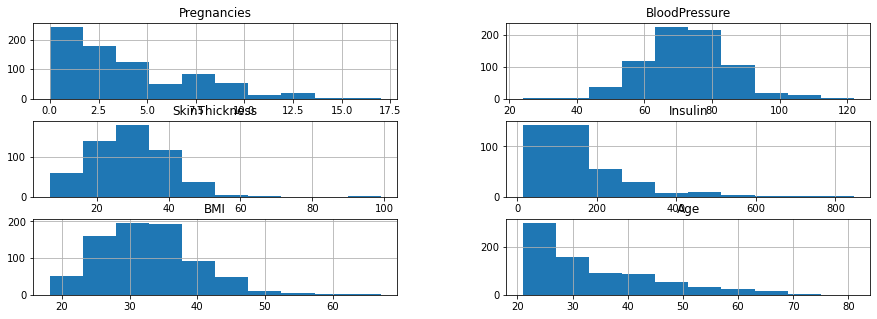

In [25]:
diab_d2[['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].hist(figsize =(15,5))

In [26]:
diab_d2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
diab_d2['Glucose'].fillna(diab_d2['Glucose'].mean(), inplace = True)
diab_d2['BloodPressure'].fillna(diab_d2['BloodPressure'].mean(), inplace = True)
diab_d2['SkinThickness'].fillna(diab_d2['BloodPressure'].median(), inplace = True)
diab_d2['Insulin'].fillna(diab_d2['BloodPressure'].median(), inplace = True)
diab_d2['BMI'].fillna(diab_d2['BMI'].median(), inplace = True)


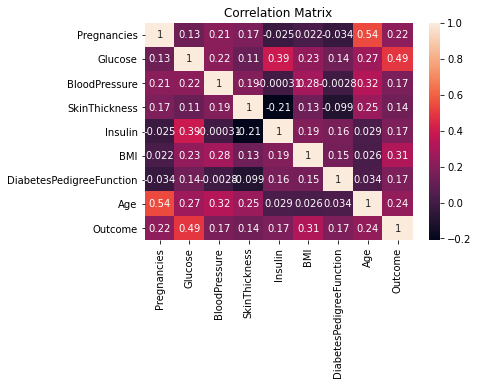

In [28]:
sns.heatmap(diab_d2.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


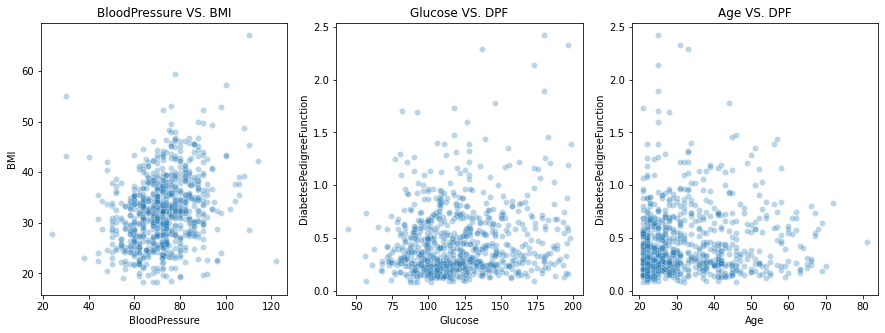

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


sns.scatterplot(x='BloodPressure', y='BMI', data=diab_d2, alpha=0.3, ax=axes[0])
axes[0].set_title('BloodPressure VS. BMI')
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diab_d2, alpha=0.3, ax=axes[1])
axes[1].set_title('Glucose VS. DPF')

sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=diab_d2, alpha=0.3, ax=axes[2])
axes[2].set_title('Age VS. DPF')

plt.show()


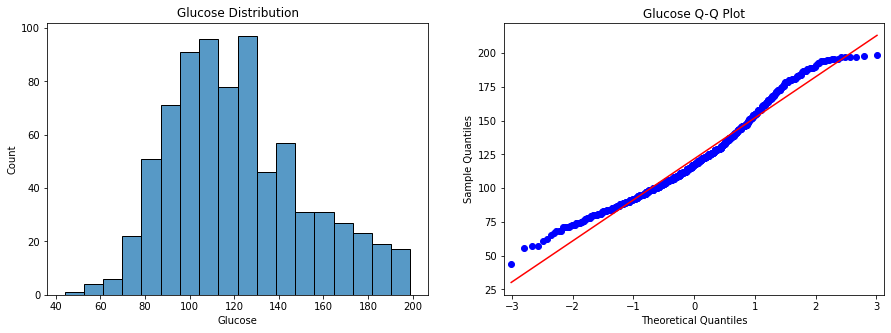

Shapiro Wilk: 
w:0.969902515411377, p value:1.7774986343921384e-11

Kolmogorov Smirnov: 
d:0.969902515411377, p value:0.0

Skewness of the data: 
0.531677628850459



In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(diab_d2['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')
sm.qqplot(diab_d2['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')
pylab.show()
w, p_val = scipy.stats.shapiro(diab_d2['Glucose'])
print('Shapiro Wilk: \nw:{}, p value:{}\n'.format(w,p_val))
d, p_val = scipy.stats.kstest(diab_d2['Glucose'], 'norm')
print('Kolmogorov Smirnov: \nd:{}, p value:{}\n'.format(w,p_val))
print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diab_d2['Glucose'])))


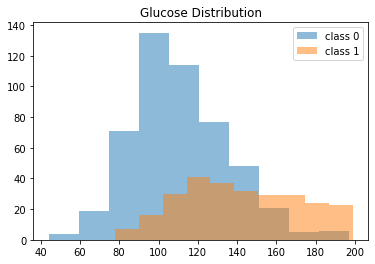

In [32]:
class_zero = diab_d2[(diab_d2['Outcome'] == 0)]
class_one = diab_d2[(diab_d2['Outcome'] == 1)]
plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')
plt.show()

In [34]:
 
X = diab_d2.drop('Outcome', axis=1)
y = diab_d2['Outcome']
 
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(data=X_scaled, columns=X.columns)


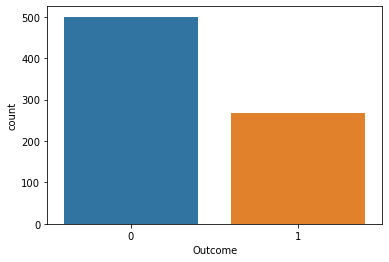

In [37]:
sns.countplot(x=diab_d2['Outcome'])
plt.show()


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [41]:
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


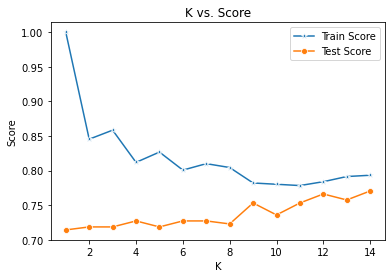

In [43]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()


In [44]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.56      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[129  21]
 [ 36  45]]
